# Packages

In [94]:
#Standard python libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings(action='ignore') 

# Preprocessing tools
from sklearn.model_selection import train_test_split,cross_val_predict,cross_validate
from sklearn.preprocessing import MinMaxScaler,StandardScaler,OneHotEncoder
scaler = StandardScaler()
from sklearn import metrics

# # Models & Utilities
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

# Warnings
import warnings
warnings.filterwarnings(action='ignore') 

# NLP Libraries
import nltk
import collections
nltk.download('punkt')
from sklearn.manifold import TSNE
from nltk.tokenize import word_tokenize
np.random.seed(0)
import re
from nltk.corpus import stopwords
from nltk.collocations import *
from nltk import FreqDist
from nltk import word_tokenize
from nltk import ngrams
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.datasets import fetch_20newsgroups
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

# Added
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Johnny\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Johnny\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
df = pd.read_csv('data/IMDB Dataset.csv')

df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
# Taking a look at our columns
print(df.info())

# Checking for NA data
print(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None
review       0
sentiment    0
dtype: int64


In [4]:
df['sentiment'].value_counts()

negative    25000
positive    25000
Name: sentiment, dtype: int64

In [5]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,negative
freq,5,25000


### remove duplicates?

### change pos to 1 and neg to 0

## Add features

In [6]:
run = False

if run == True:

    ## Indirect features
    eng_stopwords = set(stopwords.words("english"))

    df['count_sent']=df["review"].apply(lambda x: len(re.findall("\n",str(x)))+1)
    #Word count in each comment:
    df['count_word']=df["review"].apply(lambda x: len(str(x).split()))
    #Unique word count
    df['count_unique_word']=df["review"].apply(lambda x: len(set(str(x).split())))
    #Letter count
    df['count_letters']=df["review"].apply(lambda x: len(str(x)))
    #punctuation count
    df["count_punctuations"] =df["review"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
    #upper case words count
    df["count_words_upper"] = df["review"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))
    #title case words count
    df["count_words_title"] = df["review"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))
    #Number of stopwords
    df["count_stopwords"] = df["review"].apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))
    #Average length of the words
    df["mean_word_len"] = df["review"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
    #Word count percent in each comment:
    df['word_unique_percent']=df['count_unique_word']*100/df['count_word']
    #Punct percent in each comment:
    df['punct_percent']=df['count_punctuations']*100/df['count_word']
    #derived features
    #Word count percent in each comment:
    df['word_unique_percent']=df['count_unique_word']*100/df['count_word']
    #derived features
    #Punct percent in each comment:
    df['punct_percent']=df['count_punctuations']*100/df['count_word']
    
    df.to_json('data/df_json_store.json')
    
else:
     df = pd.read_json('data/df_json_store.json')
        
df.head(2)

,review,sentiment,count_sent,count_word,count_unique_word,count_letters,count_punctuations,count_words_upper,count_words_title,count_stopwords,mean_word_len,word_unique_percent,punct_percent
0,One of the other reviewers has mentioned that ...,positive,1,307,208,1761,78,8,36,133,4.739414,67.752443,25.407166
1,A wonderful little production. <br /><br />The...,positive,1,162,114,998,44,2,12,66,5.166667,70.370370,27.160494


### 25 most common words in positive and negative reviews

In [7]:

# ax = neg_freq_df.set_index('Word').sort_values('Frequency').plot(kind='barh')
# ax.set(title="25 Most Common Words in Negative Tweets")

### Word clouds pos / neg

### visualize TSNE

### mean word length postive or negative?.  bucket and histogram?

### Same with word unique percentage

Sentiment across word count

Word count histogram



In [8]:
df

,review,sentiment,count_sent,count_word,count_unique_word,count_letters,count_punctuations,count_words_upper,count_words_title,count_stopwords,mean_word_len,word_unique_percent,punct_percent
0,One of the other reviewers has mentioned that ...,positive,1,307,208,1761,78,8,36,133,4.739414,67.752443,25.407166
1,A wonderful little production. <br /><br />The...,positive,1,162,114,998,44,2,12,66,5.166667,70.370370,27.160494
2,I thought this was a wonderful way to spend ti...,positive,1,166,121,926,40,3,20,76,4.584337,72.891566,24.096386
3,Basically there's a family where a little boy ...,negative,1,138,96,748,42,3,13,62,4.427536,69.565217,30.434783
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1,230,152,1317,56,1,31,96,4.730435,66.086957,24.347826
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,I thought this movie did a down right good job...,positive,1,194,127,1008,46,3,7,102,4.201031,65.463918,23.711340
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,1,112,85,642,26,3,15,51,4.741071,75.892857,23.214286
49997,I am a Catholic taught in parochial elementary...,negative,1,230,148,1280,45,5,21,111,4.569565,64.347826,19.565217
49998,I'm going to have to disagree with the previou...,negative,1,212,154,1234,28,0,20,96,4.825472,72.641509,13.207547


# Text Preprocessing

## Remove

In [9]:
first_review = df['review'][0][0:500]
first_review

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ"

In [10]:
## From tjhe lessons
from nltk import regexp_tokenize
pattern = r"([a-zA-Z]+(?:'[a-z]+)?)"
regexp_tokenize(first_review,pattern)

['One',
 'of',
 'the',
 'other',
 'reviewers',
 'has',
 'mentioned',
 'that',
 'after',
 'watching',
 'just',
 'Oz',
 'episode',
 "you'll",
 'be',
 'hooked',
 'They',
 'are',
 'right',
 'as',
 'this',
 'is',
 'exactly',
 'what',
 'happened',
 'with',
 'me',
 'br',
 'br',
 'The',
 'first',
 'thing',
 'that',
 'struck',
 'me',
 'about',
 'Oz',
 'was',
 'its',
 'brutality',
 'and',
 'unflinching',
 'scenes',
 'of',
 'violence',
 'which',
 'set',
 'in',
 'right',
 'from',
 'the',
 'word',
 'GO',
 'Trust',
 'me',
 'this',
 'is',
 'not',
 'a',
 'show',
 'for',
 'the',
 'faint',
 'hearted',
 'or',
 'timid',
 'This',
 'show',
 'pulls',
 'no',
 'punches',
 'with',
 'regards',
 'to',
 'drugs',
 'sex',
 'or',
 'violence',
 'Its',
 'is',
 'hardcore',
 'in',
 'the',
 'classic',
 'use',
 'of',
 'the',
 'word',
 'br',
 'br',
 'It',
 'is',
 'called',
 'OZ']

In [11]:
stop_words_list = stopwords.words('english')

stop_words_list.append('br')

In [12]:
tokens = regexp_tokenize(first_review, pattern)

tokens

bad_tags = ['br']

cleaned_tokens = []

for token in tokens:
    if token not in bad_tags:
        cleaned_tokens.append(token)
        
cleaned_tokens[0:5]
    

['One', 'of', 'the', 'other', 'reviewers']

In [113]:
remove_words = ["i've", "i'm", 'br']

In [123]:
def my_tokenizer(first_review, stop_words=False, 
                 remove_words=remove_words, show_full=False):
                
        pattern = r"([a-zA-Z]+(?:'[a-z]+)?)"
        tokens = regexp_tokenize(first_review.lower(), pattern)

        stop_words_list = []
        
        if stop_words == True:            
            stop_words_list = stopwords.words('english')
            
        stop_words_list += remove_words
        [x.lower() for x in stop_words_list]
        cleaned_tokens = []

        for token in tokens:
            if token not in stop_words_list:
                cleaned_tokens.append(token)
        
        if show_full == False:
            return cleaned_tokens
        else:
            return " ".join(cleaned_tokens)#, stop_words_list
    
my_tokenizer("i'm going to the store", stop_words=True, show_full=True)


'going store'

In [124]:
df['reviews_t'] = df['review'].apply(lambda text: my_tokenizer(text, stop_words=True))

df['reviews_t']


0        [one, reviewers, mentioned, watching, oz, epis...
1        [wonderful, little, production, filming, techn...
2        [thought, wonderful, way, spend, time, hot, su...
3        [basically, there's, family, little, boy, jake...
4        [petter, mattei's, love, time, money, visually...
                               ...                        
49995    [thought, movie, right, good, job, creative, o...
49996    [bad, plot, bad, dialogue, bad, acting, idioti...
49997    [catholic, taught, parochial, elementary, scho...
49998    [going, disagree, previous, comment, side, mal...
49999    [one, expects, star, trek, movies, high, art, ...
Name: reviews_t, Length: 50000, dtype: object

# EDA TO DO:

Break out everything by positive and negative FIRST

visualize pos neg bigrams trigrams etc

Are pos negative review shorter or longer

Are longer words more typical of positive or negative reviews

Code to use from: 

https://medium.com/plotly/nlp-visualisations-for-clear-immediate-insights-into-text-data-and-outputs-9ebfab168d5b

fig = px.bar(long_bigram_df_tidy, title='Comparision: ' + ngrams_list[0] + ' | ' + ngrams_list[1], x='ngram', y='value'
             , color='variable', template='plotly_white', color_discrete_sequence=px.colors.qualitative.Bold
             , labels={'variable': 'Company:', 'ngram': 'N-Gram'})
fig.update_layout(legend_orientation="h")
fig.update_layout(legend=dict(x=0.1, y=1.1))
fig.update_yaxes(title='', showticklabels=False)
fig.show()

## Bag of Words

In [125]:
# Tokens

tokens = []

for row in df['reviews_t']:
    tokens.extend(row)
    
print(f'Number of tokens: {len(tokens)}')


Number of tokens: 5948258


In [126]:
# Number of unique tokens

len(review_freqdist)

109354

In [127]:
# Frequency distribution

review_freqdist = FreqDist(tokens)
most_common = review_freqdist.most_common(50)

In [128]:
print(most_common)

[('movie', 87163), ('film', 77758), ('one', 53090), ('like', 40171), ('good', 29745), ('time', 25094), ('even', 24872), ('would', 24234), ('really', 23094), ('story', 23015), ('see', 23007), ('well', 21267), ('much', 19320), ('bad', 18473), ('get', 18370), ('great', 18144), ('also', 17977), ('people', 17867), ('first', 17583), ('made', 16152), ('make', 15890), ('way', 15643), ('movies', 15306), ('could', 15216), ('characters', 14451), ('think', 14338), ('watch', 13947), ('films', 13752), ('two', 13540), ('many', 13445), ('seen', 13375), ('character', 13327), ('never', 12981), ('love', 12978), ('plot', 12957), ('acting', 12855), ('life', 12808), ('best', 12609), ('know', 12492), ('show', 12447), ('little', 12434), ('ever', 12028), ('better', 11430), ('man', 11150), ('end', 11119), ('scene', 10921), ('still', 10859), ('say', 10764), ('scenes', 10482), ('something', 10120)]


In [129]:
total = review_freqdist.N()
for word in review_freqdist:
    review_freqdist[word] /= float(total)

review_freqdist

FreqDist({'movie': 0.014653533858148049, 'film': 0.013072398675376892, 'one': 0.008925302164095775, 'like': 0.006753405787038827, 'good': 0.005000623712017872, 'time': 0.004218714117645872, 'even': 0.0041813922664417046, 'would': 0.0040741339733414384, 'really': 0.0038824812239146318, 'story': 0.0038692000246122477, ...})

In [130]:
total_word_count = sum(review_freqdist.values())
review_top_10 = review_freqdist.most_common(10)
print('Word\t\t\tNormalized Frequency')
for word in review_top_10:
    normalized_frequency = word[1] / total_word_count
    print('{} \t\t\t {:.4}'.format(word[0], normalized_frequency))

Word			Normalized Frequency
movie 			 0.01465
film 			 0.01307
one 			 0.008925
like 			 0.006753
good 			 0.005001
time 			 0.004219
even 			 0.004181
would 			 0.004074
really 			 0.003882
story 			 0.003869


## Word Clouds

In [145]:
# !pip install wordcloud

from wordcloud import WordCloud

### To Do:

Break out by positive and negative

### Positive

In [177]:
# Positive tokens

df_positive = df['reviews_t'].loc[df['sentiment'] == 'positive']

tokens_positive = []

for row in df_pos:
    tokens_positive.extend(row)
    
print(f'Number of tokens: {len(tokens_positive)}')

Number of tokens: 3015612


Number of tokens: 3015612


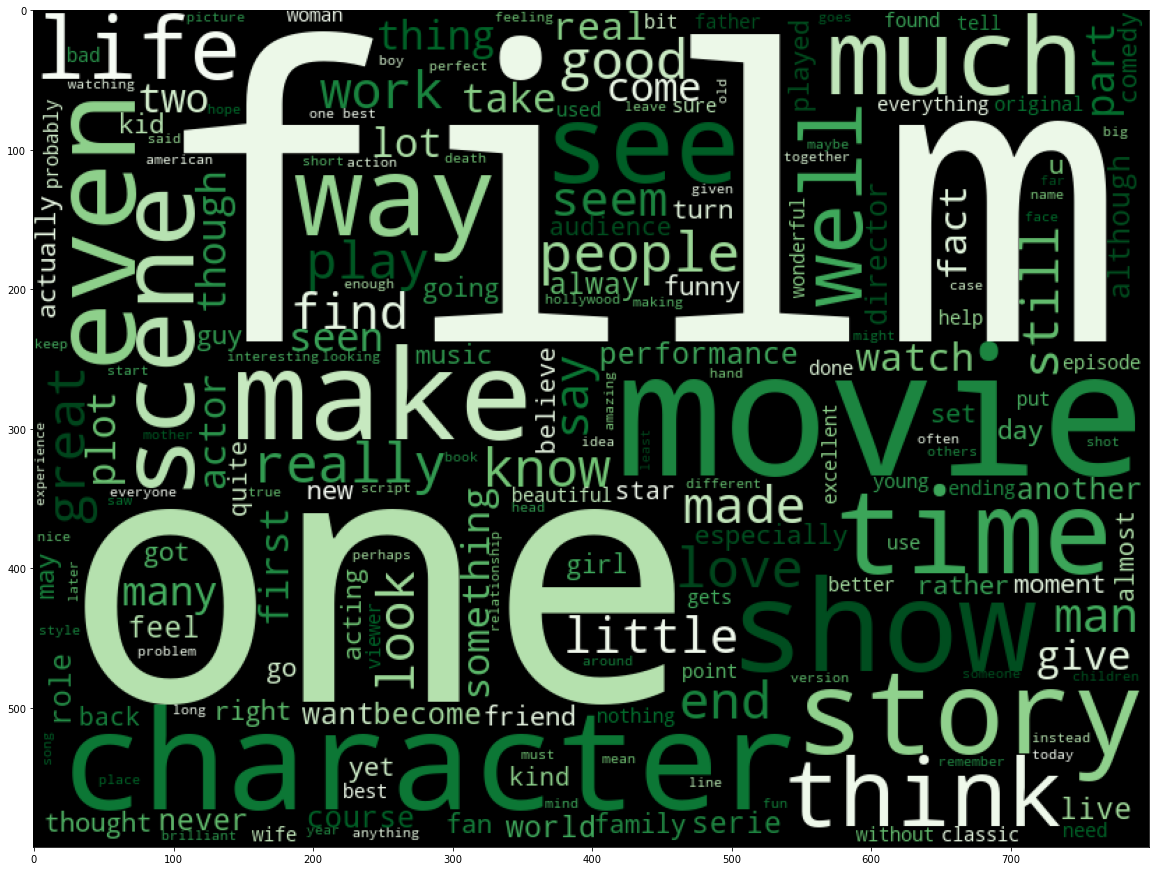

In [198]:
#Positive reviews
from wordcloud import WordCloud, STOPWORDS
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 200, 
               width = 800, height = 600, 
               colormap='Greens',
               stopwords = STOPWORDS).generate(" ".join(tokens_positive))

plt.imshow(wc)


In [200]:
plt.show(wc)

### Positive

In [199]:
# Positive tokens

df_negative = df['reviews_t'].loc[df['sentiment'] == 'negative']

tokens_negative = []

for row in df_negative:
    tokens_negative.extend(row)
    
print(f'Number of tokens: {len(tokens_negative)}')

Number of tokens: 2932646


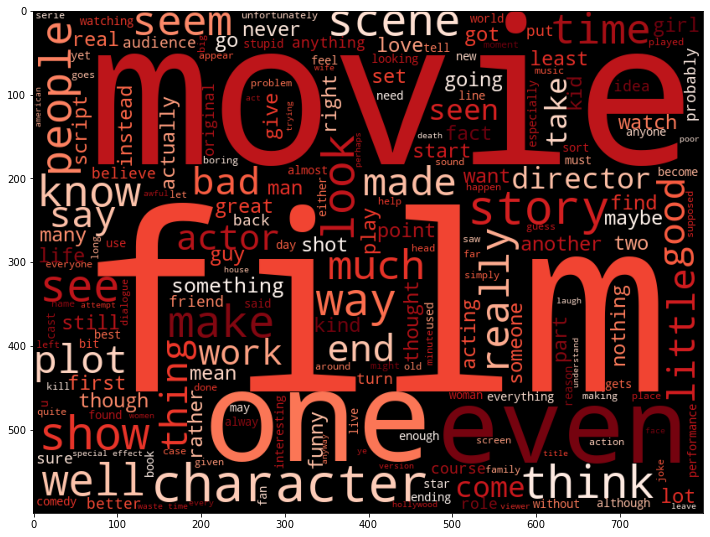

In [202]:
#Positive reviews
from wordcloud import WordCloud, STOPWORDS
plt.figure(figsize = (12,12))
wc = WordCloud(max_words = 200, 
               width = 800, height = 600, 
               colormap='Reds',
               stopwords = STOPWORDS).generate(" ".join(tokens_negative))

plt.imshow(wc)


## Ngrams

In [133]:
n_gram = (pd.Series(nltk.ngrams(tokens, 2)).value_counts())[:7]

        word  count
0   (movie,)  87163
1    (film,)  77758
2     (one,)  53090
3    (like,)  40171
4    (good,)  29745
5    (time,)  25094
6    (even,)  24872
7   (would,)  24234
8  (really,)  23094
9   (story,)  23015


<AxesSubplot:xlabel='count', ylabel='word'>

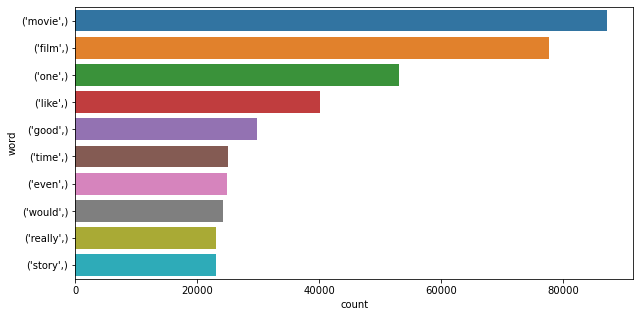

In [137]:
def plot_ngram(tokens, i):
    n_gram = (pd.Series(nltk.ngrams(tokens, i)).value_counts())[:10]
    n_gram_df=pd.DataFrame(n_gram)
    n_gram_df = n_gram_df.reset_index()
    n_gram_df = n_gram_df.rename(columns={"index": "word", 0: "count"})
    print(n_gram_df.head(10))
    plt.figure(figsize = (10,5))
    return sns.barplot(x='count',y='word', data=n_gram_df)

plot_ngram(tokens, 1)

                 word  count
0        (ever, seen)   2713
1  (special, effects)   2249
2      (even, though)   1999
3         (one, best)   1915
4       (low, budget)   1823
5       (looks, like)   1642
6         (year, old)   1573
7        (see, movie)   1521
8       (waste, time)   1509
9      (much, better)   1497


<AxesSubplot:xlabel='count', ylabel='word'>

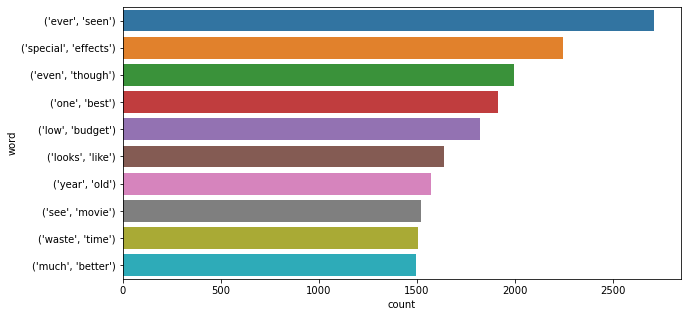

In [138]:
plot_ngram(tokens, 2)

                    word  count
0    (movie, ever, seen)    521
1   (worst, movie, ever)    465
2   (movies, ever, seen)    376
3   (one, worst, movies)    313
4  (worst, movies, ever)    283
5      (new, york, city)    266
6       (world, war, ii)    231
7    (films, ever, seen)    223
8     (film, ever, seen)    218
9    (movie, ever, made)    209


<AxesSubplot:xlabel='count', ylabel='word'>

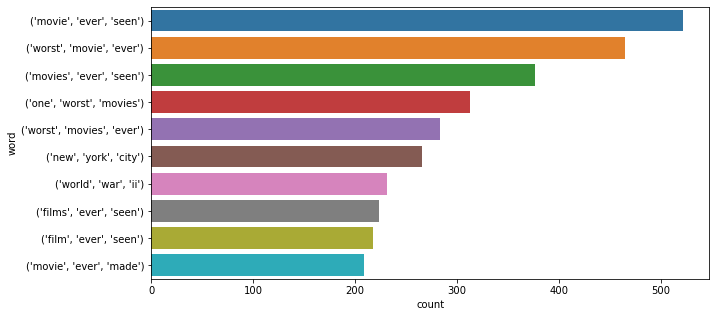

In [139]:
plot_ngram(tokens, 3)

                          word  count
0   (worst, movie, ever, seen)    259
1   (one, worst, movies, ever)    243
2  (worst, movies, ever, seen)    178
3    (one, worst, films, ever)    120
4    (worst, film, ever, seen)    103
5   (worst, films, ever, seen)     85
6   (worst, movie, ever, made)     72
7    (one, best, movies, ever)     61
8  (worst, movies, ever, made)     57
9    (worst, film, ever, made)     51


<AxesSubplot:xlabel='count', ylabel='word'>

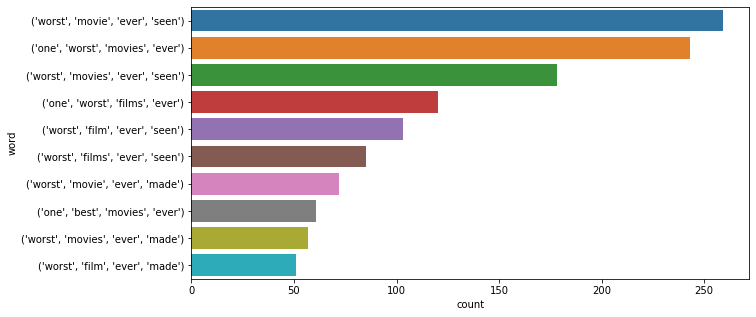

In [140]:
plot_ngram(tokens, 4)

# Modeling

In [ ]:
# df['reviews_p'] = df['reviews_t']

# X_train, X_test, y_train, y_test = train_test_split(df['reviews_p'], df['sentiment'], test_size=0.3,random_state=0)

## TF - IDF

In [ ]:
## set up text preprocessing pipeline

from sklearn.feature_extraction.text import CountVectorizer

tfidf = TfidfVectorizer(strip_accents='unicode',
                              tokenizer=my_tokenizer,

                             stop_words=stop_words_list
                            )

X = df['review']
y = df['sentiment']

# Do train test split here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

# Fit both x train and test
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)




In [ ]:
# Logistic Regression with TF-IDF Vectoriser
tfidf_log = LogisticRegression(penalty='l2',C=10)
tfidf_log.fit(X_train_tfidf, y_train)

In [ ]:
def evaluate_model(model, X_train=X_train, X_test=X_test, y_train=y_train, 
                   y_test=y_test, cmap='Greens', normalize='true',
                   classes=None,figsize=(10,4)):
    
    # Print model accuracy
    print(f'Training Accuracy: {model.score(X_train,y_train):.2%}')
    print(f'Test Accuracy: {model.score(X_test,y_test):.2%}')
    print('')
    
    # Print classification report
    y_test_predict = model.predict(X_test)
    print(metrics.classification_report(y_test, y_test_predict,
                                        target_names=classes))
    
    # Plot confusion matrix
    fig,ax = plt.subplots(ncols=2,figsize=figsize)
    metrics.plot_confusion_matrix(model, X_test,y_test,cmap=cmap, 
                                  normalize=normalize,display_labels=classes,
                                  ax=ax[0])
    
    #Plot ROC curves
    with sns.axes_style("darkgrid"):
        curve = metrics.plot_roc_curve(model,X_train,y_train,ax=ax[1])
        curve2 = metrics.plot_roc_curve(model,X_test,y_test,ax=ax[1])
        curve.ax_.grid()
        curve.ax_.plot([0,1],[0,1],ls=':')
        fig.tight_layout()
        plt.show()

In [ ]:
evaluate_model(tfidf_log, X_train=X_train_tfidf, X_test=X_test_tfidf)

## Count Vectorizer

In [ ]:
## set up text preprocessing pipeline

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(strip_accents='unicode',
                              tokenizer=my_tokenizer,

                             stop_words=stop_words_list
                            )

# X = df['review']
# y = df['sentiment']

# X

# # Do train test split here
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

# Fit both x train and test
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)




In [ ]:
# X_train_cv

In [ ]:
# Logistic Regression with Count Vectoriser
cv_log = LogisticRegression(penalty='l2',C=10)
cv_log.fit(X_train_cv, y_train)

In [ ]:
evaluate_model(cv_log, X_train=X_train_cv, X_test=X_test_cv)

# Word analysis

## Frequency Distribution

## Normalized word frequency

## Bigrams

## Mutual information scores



### TF-IDF vectorization
#### Visualize Vector


### bag of words

## Models

# Scratch